In [1]:
import os
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data from UCI Machine Learning Repository:

In [2]:
# only have to run once

try:
    # Create data Directory
    os.mkdir('data')
    print("data Directory Created ") 
except FileExistsError:
    print("data Directory already exists")


!wget -O data/processed.cleveland.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
!wget -O data/processed.hungarian.data.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
!wget -O data/processed.switzerland.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data
!wget -O data/processed.va.data.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data
!wget -O data/heart-disease.names.csv http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names
                

data Directory already exists
--2020-01-17 17:45:32--  http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18461 (18K) [application/x-httpd-php]
Saving to: ‘data/processed.cleveland.data.csv’

data/processed.clev 100%[===================>]  18.03K  --.-KB/s    in 0.1s    

2020-01-17 17:45:32 (122 KB/s) - ‘data/processed.cleveland.data.csv’ saved [18461/18461]

--2020-01-17 17:45:33--  http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10263 (10K) [application/x-httpd-php]
Savin

### Concatenate 4 datasets to one:

In [3]:
allFiles = glob.glob('data' + '/*.data.csv')

heart_disease_df = pd.DataFrame()
list_ = []

# column names as described in heart-disease.names.csv file
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, names=col_names)
    list_.append(df)
heart_disease_df = pd.concat(list_, sort=False, ignore_index=True)
heart_disease_df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
915,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1
916,62.0,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2
918,58.0,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0
919,62.0,1.0,2.0,120,254,0,2,93,1,0,?,?,?,1


### Data Cleaning

In [4]:
# Replace '?' values with np.nan
heart_disease_df.replace(to_replace='?', value=-np.nan, inplace=True)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
915,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1
916,62.0,1.0,1.0,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2
918,58.0,1.0,4.0,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0
919,62.0,1.0,2.0,120,254,0,2,93,1,0,NaN,NaN,NaN,1


In [5]:
# count percentage of NaN values in each dataset column
(1 - heart_disease_df.count() / len(heart_disease_df)) * 100

age          0.000000
sex          0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalach      5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [6]:
# clear rows of columns that have NaN percentage < 10 %
len_before_cleaning = len(heart_disease_df)
cols_to_clear = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak']
for col_name in cols_to_clear:
    heart_disease_df.drop(heart_disease_df[heart_disease_df[col_name].isnull()].index, inplace=True)
heart_disease_df.reset_index(drop=True, inplace=True)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158,170,0,1,138,1,0,NaN,NaN,NaN,1
736,46.0,1.0,4.0,134,310,0,0,126,0,0,NaN,NaN,3,2
737,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1
738,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2
739,62.0,1.0,2.0,120,254,0,2,93,1,0,NaN,NaN,NaN,1


In [7]:
# replace remaining NaN values with -1 (unknown)
heart_disease_df.replace(to_replace=np.nan, value=-1, inplace=True)
heart_disease_df.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158,170,0,1,138,1,0,-1,-1,-1,1
736,46.0,1.0,4.0,134,310,0,0,126,0,0,-1,-1,3,2
737,54.0,0.0,4.0,127,333,1,1,154,0,0,-1,-1,-1,1
738,55.0,1.0,4.0,122,223,1,1,100,0,0,-1,-1,6,2
739,62.0,1.0,2.0,120,254,0,2,93,1,0,-1,-1,-1,1


In [8]:
# convert all numbers to float
heart_disease_df = heart_disease_df.astype(float)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
735,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,-1.0,-1.0,-1.0,1.0
736,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,-1.0,-1.0,3.0,2.0
737,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
738,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,-1.0,-1.0,6.0,2.0
739,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,-1.0,-1.0,-1.0,1.0


In [9]:
heart_disease_df['trestbps'].value_counts(normalize=True) * 100

120.0    16.081081
130.0    13.783784
140.0    11.621622
150.0     6.756757
110.0     6.081081
160.0     5.810811
125.0     3.108108
128.0     2.297297
138.0     2.027027
135.0     2.027027
112.0     1.756757
145.0     1.621622
170.0     1.621622
122.0     1.621622
132.0     1.621622
124.0     1.486486
115.0     1.486486
118.0     1.351351
100.0     1.351351
180.0     1.351351
142.0     1.216216
136.0     1.081081
134.0     1.081081
126.0     0.945946
152.0     0.945946
108.0     0.945946
144.0     0.810811
105.0     0.675676
155.0     0.675676
158.0     0.540541
178.0     0.405405
200.0     0.405405
146.0     0.405405
106.0     0.405405
172.0     0.270270
104.0     0.270270
102.0     0.270270
94.0      0.270270
190.0     0.270270
148.0     0.270270
156.0     0.270270
154.0     0.270270
114.0     0.270270
116.0     0.270270
165.0     0.135135
127.0     0.135135
96.0      0.135135
0.0       0.135135
92.0      0.135135
164.0     0.135135
98.0      0.135135
117.0     0.135135
129.0     0.

In [10]:
heart_disease_df['chol'].value_counts(normalize=True) * 100

0.0      10.675676
254.0     1.351351
220.0     1.351351
223.0     1.216216
230.0     1.216216
219.0     1.081081
211.0     1.081081
260.0     1.081081
216.0     1.081081
246.0     1.081081
204.0     0.945946
243.0     0.945946
234.0     0.945946
240.0     0.945946
263.0     0.945946
197.0     0.945946
213.0     0.945946
201.0     0.810811
226.0     0.810811
274.0     0.810811
270.0     0.810811
258.0     0.810811
275.0     0.810811
207.0     0.810811
225.0     0.810811
198.0     0.810811
193.0     0.810811
248.0     0.810811
264.0     0.810811
282.0     0.810811
           ...    
331.0     0.135135
349.0     0.135135
404.0     0.135135
176.0     0.135135
132.0     0.135135
161.0     0.135135
412.0     0.135135
328.0     0.135135
190.0     0.135135
312.0     0.135135
344.0     0.135135
85.0      0.135135
156.0     0.135135
117.0     0.135135
392.0     0.135135
388.0     0.135135
518.0     0.135135
336.0     0.135135
384.0     0.135135
279.0     0.135135
529.0     0.135135
353.0     0.

In [11]:
# remove rows with trestbps or chol = 0
heart_disease_df.drop(heart_disease_df[heart_disease_df['trestbps'] == 0].index, inplace=True)
heart_disease_df.drop(heart_disease_df[heart_disease_df['chol'] == 0].index, inplace=True)
heart_disease_df.reset_index(drop=True, inplace=True)
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
656,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,-1.0,-1.0,-1.0,1.0
657,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,-1.0,-1.0,3.0,2.0
658,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
659,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,-1.0,-1.0,6.0,2.0
660,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,-1.0,-1.0,-1.0,1.0


In [12]:
# percentage of deleted rows
len_after_cleaning = len(heart_disease_df)
print( (len_before_cleaning-len_after_cleaning)/len_before_cleaning*100 )

28.152173913043477


In [13]:
# group data into 2 categories of ‘no heart disease’ (value of 0) and ‘displaying heart disease’ (value of 1)
heart_disease_df.loc[heart_disease_df['num'] == 2, 'num'] = 1
heart_disease_df.loc[heart_disease_df['num'] == 3, 'num'] = 1
heart_disease_df.loc[heart_disease_df['num'] == 4, 'num'] = 1
heart_disease_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
656,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,-1.0,-1.0,-1.0,1.0
657,46.0,1.0,4.0,134.0,310.0,0.0,0.0,126.0,0.0,0.0,-1.0,-1.0,3.0,1.0
658,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,-1.0,-1.0,-1.0,1.0
659,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,-1.0,-1.0,6.0,1.0
660,62.0,1.0,2.0,120.0,254.0,0.0,2.0,93.0,1.0,0.0,-1.0,-1.0,-1.0,1.0


In [14]:
# calculate class balance
heart_disease_df['num'].value_counts(normalize=True) * 100

0.0    52.496218
1.0    47.503782
Name: num, dtype: float64

### Visualize dataset

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


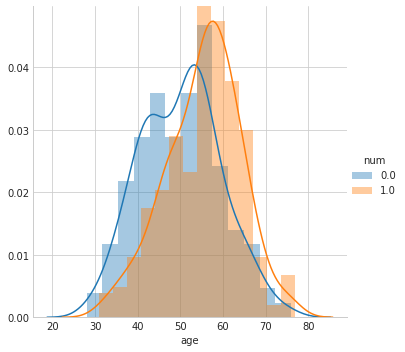

In [39]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'age').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


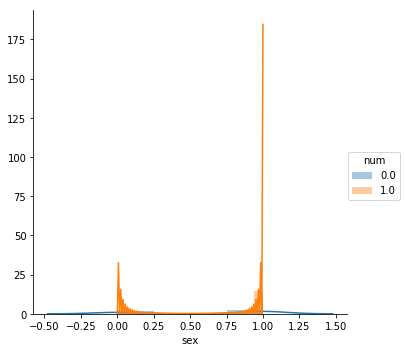

In [16]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'sex').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


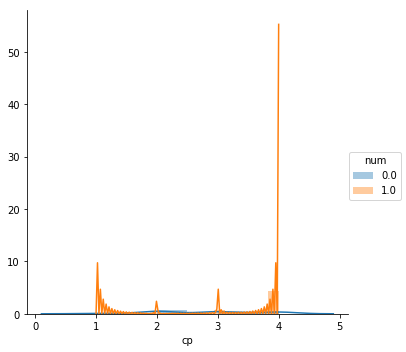

In [17]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'cp').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


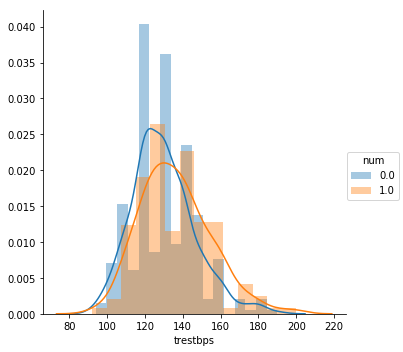

In [18]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'trestbps').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


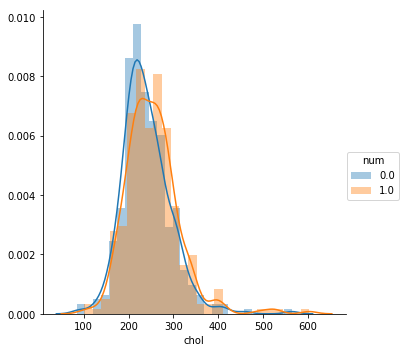

In [19]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'chol').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


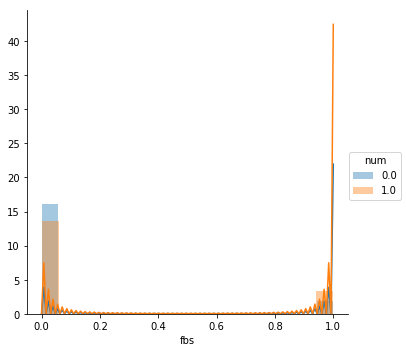

In [20]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'fbs').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


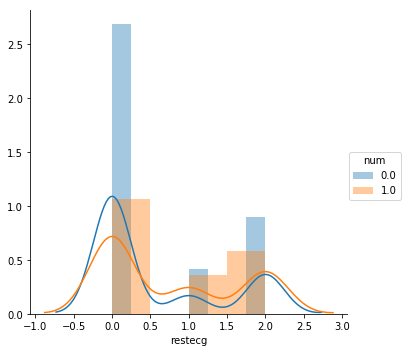

In [21]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'restecg').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


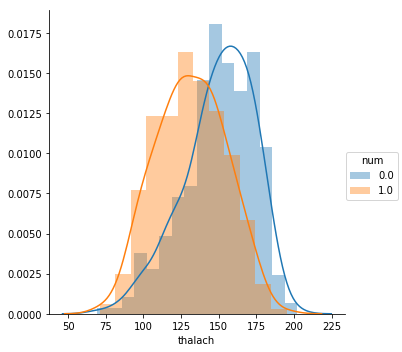

In [22]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'thalach').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


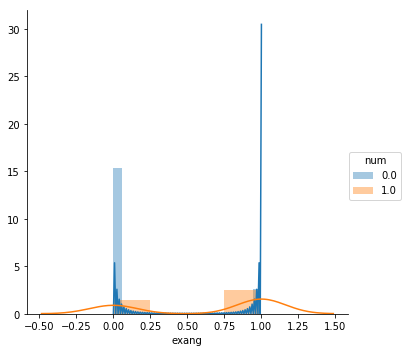

In [23]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'exang').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


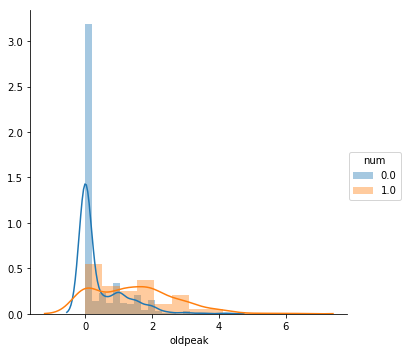

In [24]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'oldpeak').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


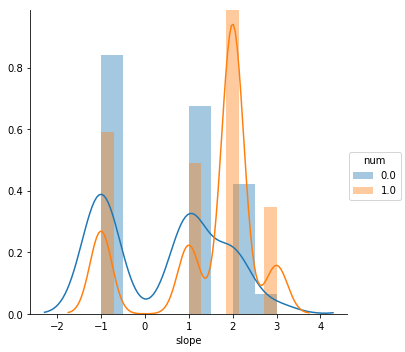

In [25]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'slope').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


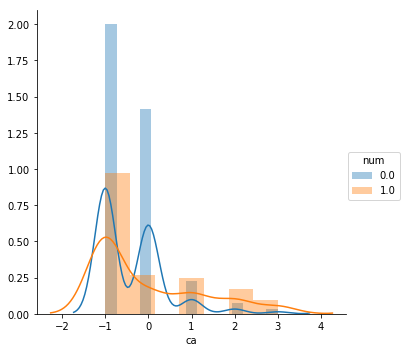

In [26]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'ca').add_legend()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


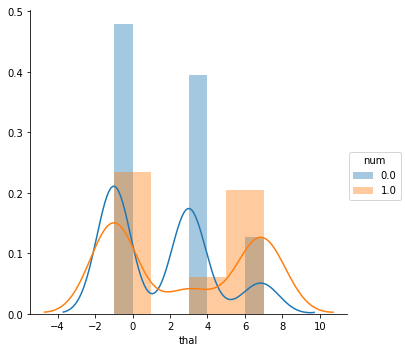

In [27]:
sns.FacetGrid(heart_disease_df, hue='num', size=5).map(sns.distplot, 'thal').add_legend()

### Feature correlation

In [28]:
heart_disease_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,0.010885,0.189123,0.260721,0.095700,0.236158,0.225696,-0.361131,0.231771,0.274029,0.316250,0.286739,0.204796,0.281379
sex,0.010885,1.000000,0.134012,0.029782,-0.086158,0.073684,-0.019131,-0.130928,0.174073,0.120687,0.009597,-0.065867,0.032445,0.285236
cp,0.189123,0.134012,1.000000,0.033281,0.089835,0.020558,0.076639,-0.356460,0.449326,0.290634,0.269395,0.084775,0.097886,0.466456
trestbps,0.260721,0.029782,0.033281,1.000000,0.106479,0.184212,0.068575,-0.126812,0.163282,0.208817,0.124355,-0.006610,-0.013577,0.178637
chol,0.095700,-0.086158,0.089835,0.106479,1.000000,0.064647,0.074795,-0.047808,0.086011,0.053908,0.077980,0.045570,0.001788,0.116613
fbs,0.236158,0.073684,0.020558,0.184212,0.064647,1.000000,0.111467,-0.094301,0.067426,0.039141,0.078807,0.051506,0.060933,0.135589
restecg,0.225696,-0.019131,0.076639,0.068575,0.074795,0.111467,1.000000,0.023860,0.054555,0.113964,0.221414,0.349183,0.287907,0.118906
thalach,-0.361131,-0.130928,-0.356460,-0.126812,-0.047808,-0.094301,0.023860,1.000000,-0.391659,-0.255355,-0.112122,0.140527,0.123080,-0.371759
exang,0.231771,0.174073,0.449326,0.163282,0.086011,0.067426,0.054555,-0.391659,1.000000,0.446481,0.427079,-0.013422,0.053087,0.504639
oldpeak,0.274029,0.120687,0.290634,0.208817,0.053908,0.039141,0.113964,-0.255355,0.446481,1.000000,0.649452,0.221721,0.182106,0.474658


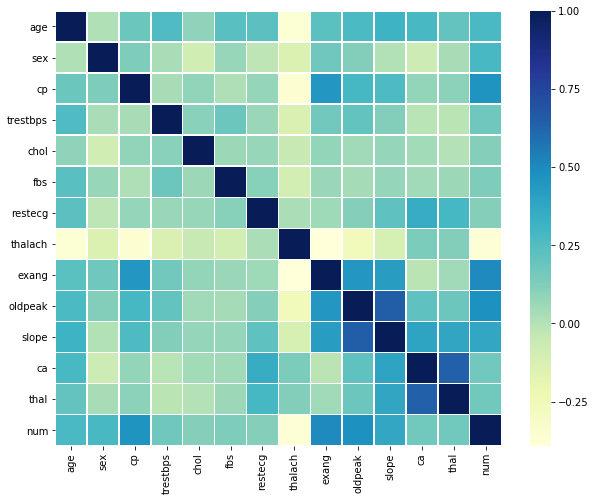

In [29]:
corrMatrix = heart_disease_df.corr()

fig, ax = plt.subplots(figsize=(10,8))

sns.heatmap(corrMatrix, cmap="YlGnBu", linewidths=.5)


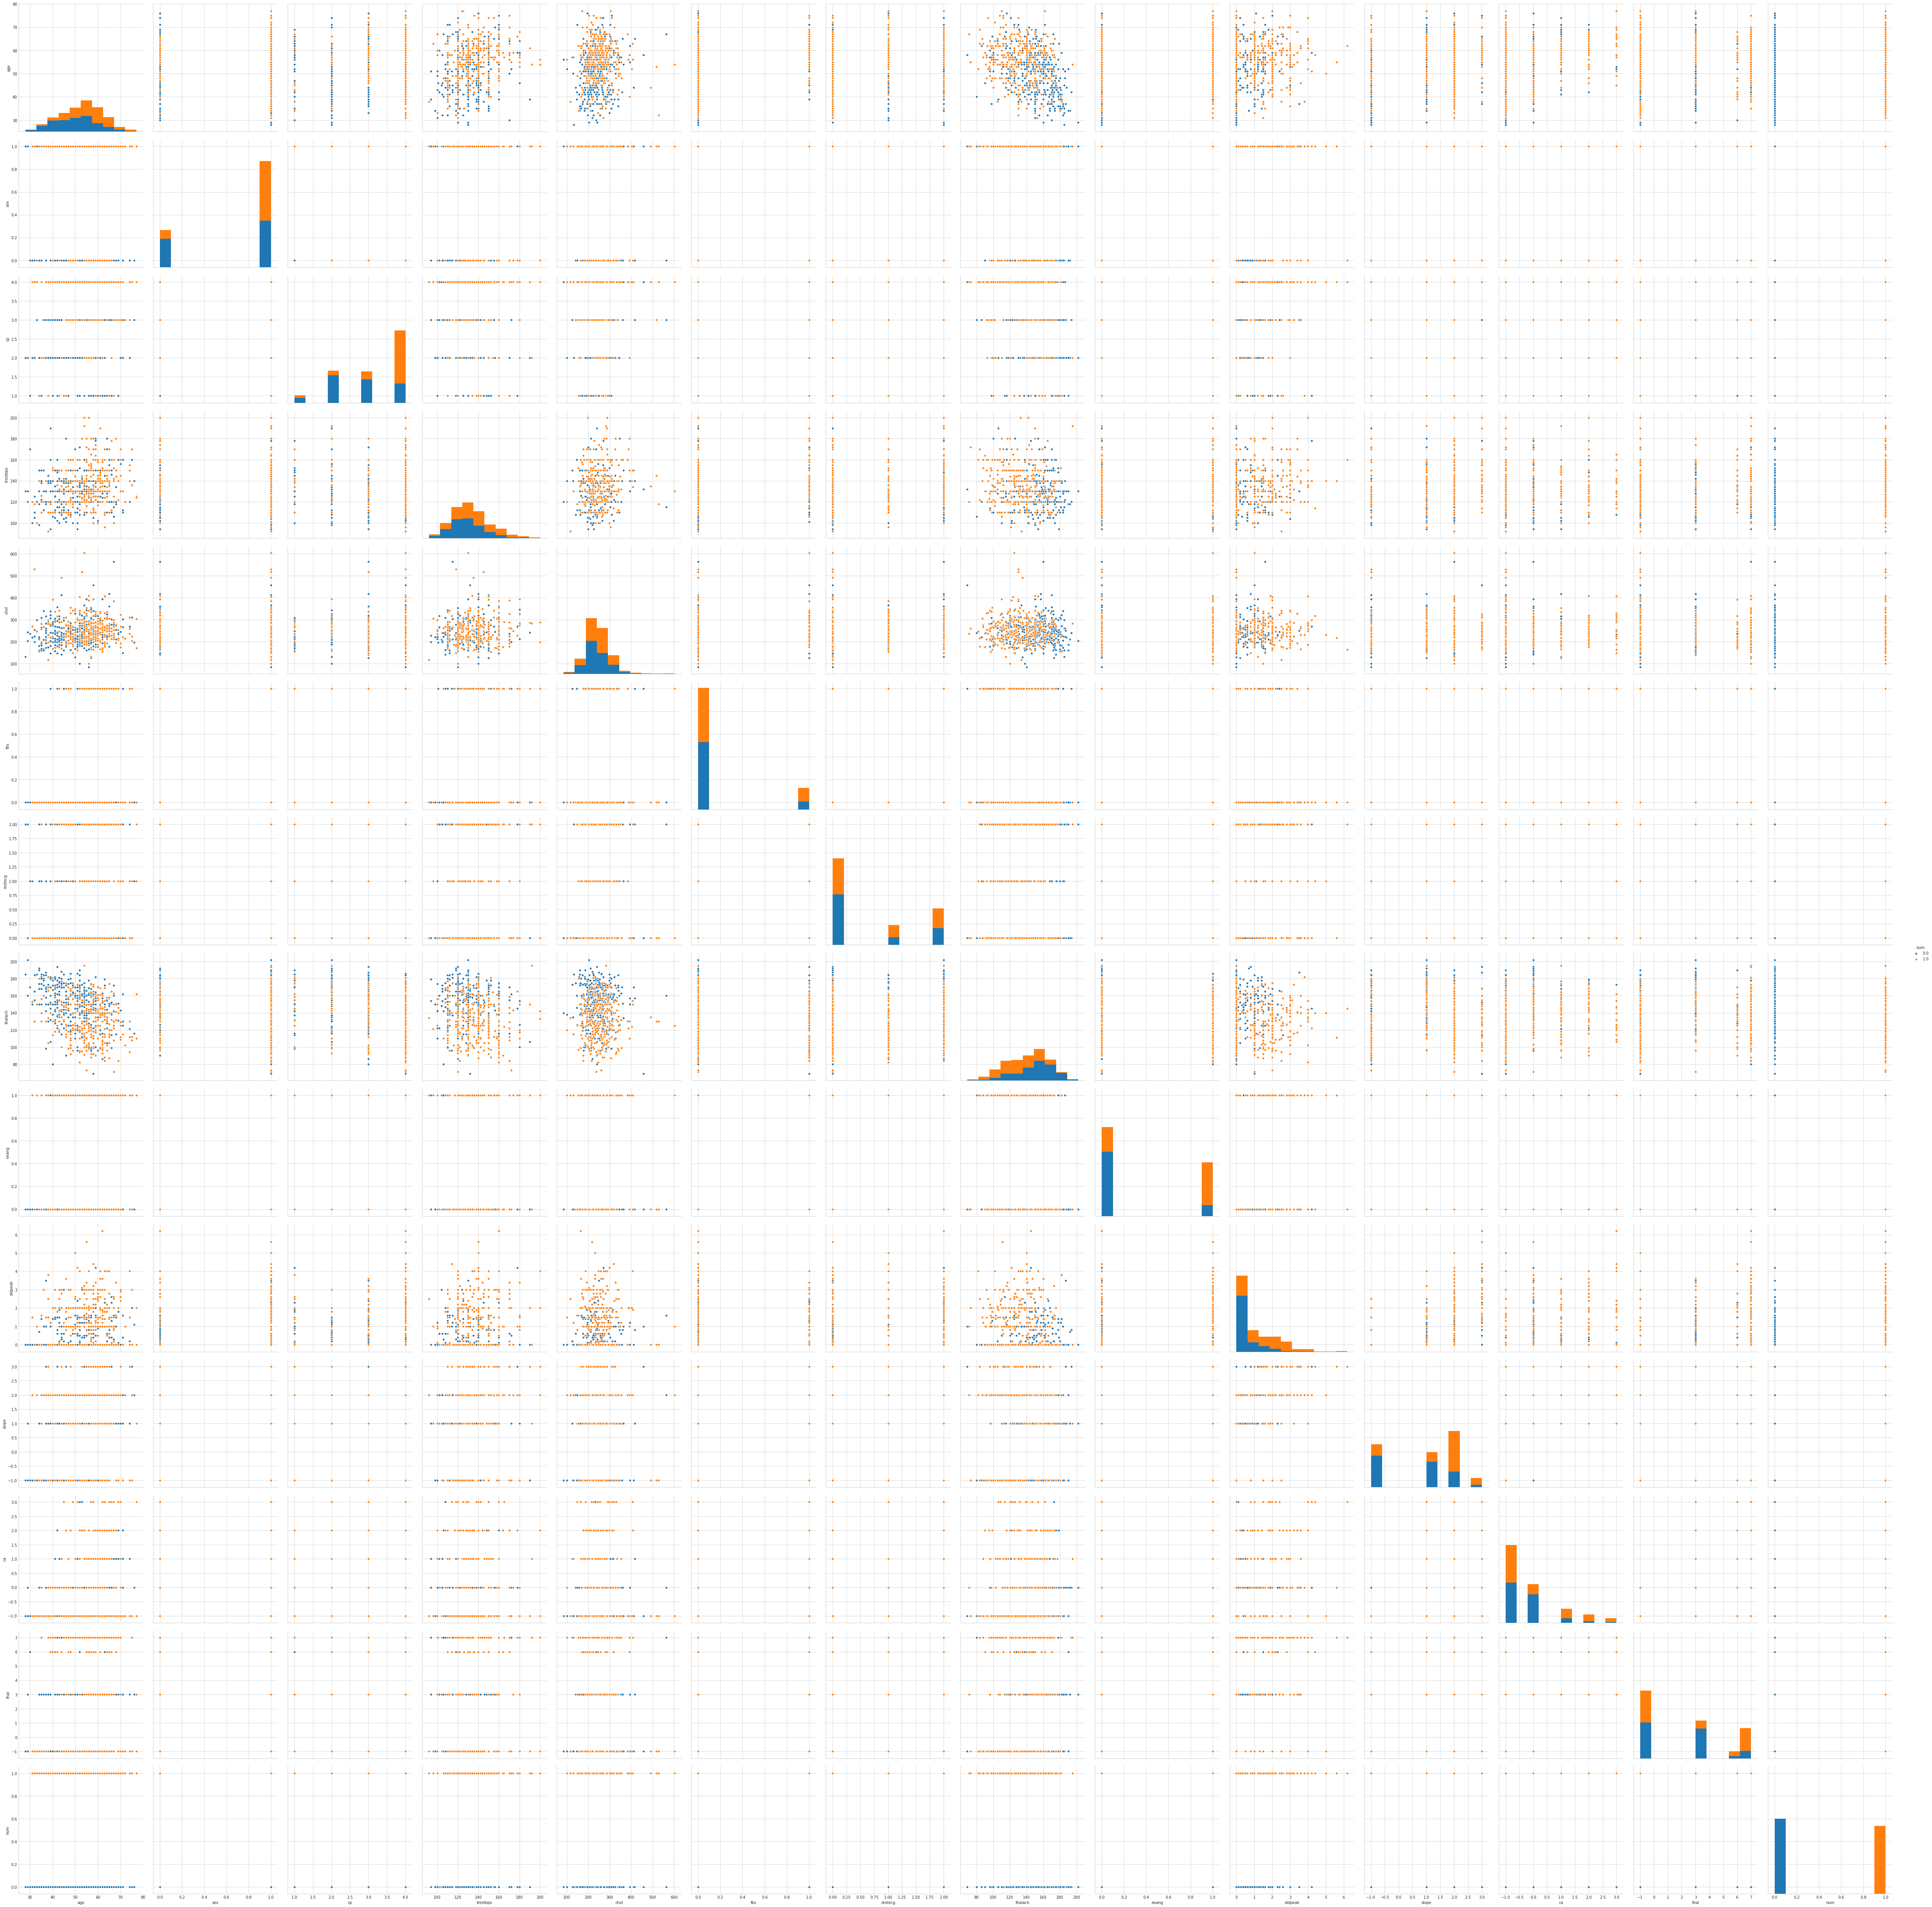

In [30]:
sns.set_style("whitegrid")
sns.pairplot(heart_disease_df, hue="num", size=5);
plt.show()

### Split into train/test datasets

In [31]:
# split into train/test
def train_test_split(transaction_df, train_frac= 0.7, seed=1):
    '''Shuffle the data and randomly split into train and test sets;
       separate the class labels (the column in transaction_df) from the features.
       :param df: Dataframe of all credit card transaction data
       :param train_frac: The decimal fraction of data that should be training data
       :param seed: Random seed for shuffling and reproducibility, default = 1
       :return: Two tuples (in order): (train_features, train_labels), (test_features, test_labels)
       '''
    
    # convert the df into a matrix for ease of splitting
    df_matrix = transaction_df.values
    
    # shuffle the data
    np.random.seed(seed)
    np.random.shuffle(df_matrix)
    
    # split the data
    train_size = int(df_matrix.shape[0] * train_frac)
    # features are all but last column
    train_features  = df_matrix[:train_size, :-1]
    # class labels *are* last column
    train_labels = df_matrix[:train_size, -1]
    # test data
    test_features = df_matrix[train_size:, :-1]
    test_labels = df_matrix[train_size:, -1]
    
    return (train_features, train_labels), (test_features, test_labels)


In [32]:
# get train/test data
(train_features, train_labels), (test_features, test_labels) = train_test_split(heart_disease_df, train_frac=0.7)

In [33]:
# manual test

# for a split of 0.7:0.3 there should be ~2.33x as many training as test pts
print('Training data pts: ', len(train_features))
print('Test data pts: ', len(test_features))
print()

# take a look at first item and see that it aligns with first row of data
print('First item: \n', train_features[0])
print('Label: ', train_labels[0])
print()

# test split
assert len(train_features) <= 7/3*len(test_features), \
        'Unexpected number of train/test points for a train_frac=0.7'
# test labels
assert np.all(train_labels)== 0 or np.all(train_labels)== 1, \
        'Train labels should be 0s or 1s.'
assert np.all(test_labels)== 0 or np.all(test_labels)== 1, \
        'Test labels should be 0s or 1s.'
print('Tests passed!')

Training data pts:  462
Test data pts:  199

First item: 
 [ 31.   0.   2. 100. 219.   0.   1. 150.   0.   0.  -1.  -1.  -1.]
Label:  0.0

Tests passed!


### Modeling

In [40]:
import boto3
import sagemaker
from sagemaker import get_execution_role


In [41]:
# sagemaker session, role
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

# S3 bucket name
bucket = sagemaker_session.default_bucket()

In [42]:
# import LinearLearner
from sagemaker import LinearLearner

# specify an output path
prefix = 'heartDiseasePrediction'
output_path = 's3://{}/{}'.format(bucket, prefix)

# instantiate LinearLearner
linear = LinearLearner(role=role,
                       train_instance_count=1, 
                       train_instance_type='ml.c4.xlarge',
                       predictor_type='binary_classifier',
                       output_path=output_path,
                       sagemaker_session=sagemaker_session,
                       epochs=15)


In [43]:
# convert features/labels to numpy
train_x_np = train_features.astype('float32')
train_y_np = train_labels.astype('float32')

# create RecordSet
formatted_train_data = linear.record_set(train_x_np, labels=train_y_np)

In [44]:
%%time 
# train the estimator on formatted training data
linear.fit(formatted_train_data)

2020-01-17 18:06:40 Starting - Starting the training job...
2020-01-17 18:06:41 Starting - Launching requested ML instances...
2020-01-17 18:07:39 Starting - Preparing the instances for training.........
2020-01-17 18:09:07 Downloading - Downloading input data
2020-01-17 18:09:07 Training - Downloading the training image..Docker entrypoint called with argument(s): train
[01/17/2020 18:09:23 INFO 139802781914944] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_level': u'info', u'quantile': u'0.5', u'bias_lr_mult': u'auto', u'lr_scheduler_step': u'auto', u'init_method': u'uniform', u'init_sigma': u'0.01', u'lr_scheduler_minimum_lr': u'au


2020-01-17 18:09:32 Uploading - Uploading generated training model
2020-01-17 18:09:32 Completed - Training job completed
Training seconds: 37
Billable seconds: 37
CPU times: user 507 ms, sys: 20.6 ms, total: 528 ms
Wall time: 3min 11s


In [45]:
%%time 
# deploy and create a predictor
linear_predictor = linear.deploy(initial_instance_count=1, instance_type='ml.t2.medium')

--------------------------------------------------------------------------------------------------!CPU times: user 529 ms, sys: 21.2 ms, total: 551 ms
Wall time: 8min 14s


In [46]:
# test one prediction
test_x_np = test_features.astype('float32')
result = linear_predictor.predict(test_x_np[0])

print(result)

[label {
  key: "predicted_label"
  value {
    float32_tensor {
      values: 1.0
    }
  }
}
label {
  key: "score"
  value {
    float32_tensor {
      values: 0.48514503240585327
    }
  }
}
]


In [47]:
# code to evaluate the endpoint on test data
# returns a variety of model metrics
def evaluate(predictor, test_features, test_labels, verbose=True):
    """
    Evaluate a model on a test set given the prediction endpoint.  
    Return binary classification metrics.
    :param predictor: A prediction endpoint
    :param test_features: Test features
    :param test_labels: Class labels for test data
    :param verbose: If True, prints a table of all performance metrics
    :return: A dictionary of performance metrics.
    """
    
    # We have a lot of test data, so we'll split it into batches of 100
    # split the test data set into batches and evaluate using prediction endpoint    
    prediction_batches = [predictor.predict(batch) for batch in np.array_split(test_features, 100)]
    
    # LinearLearner produces a `predicted_label` for each data point in a batch
    # get the 'predicted_label' for every point in a batch
    test_preds = np.concatenate([np.array([x.label['predicted_label'].float32_tensor.values[0] for x in batch]) 
                                 for batch in prediction_batches])
    
    # calculate true positives, false positives, true negatives, false negatives
    tp = np.logical_and(test_labels, test_preds).sum()
    fp = np.logical_and(1-test_labels, test_preds).sum()
    tn = np.logical_and(1-test_labels, 1-test_preds).sum()
    fn = np.logical_and(test_labels, 1-test_preds).sum()
    
    # calculate binary classification metrics
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    
    # printing a table of metrics
    if verbose:
        print(pd.crosstab(test_labels, test_preds, rownames=['actual (row)'], colnames=['prediction (col)']))
        print("\n{:<11} {:.3f}".format('Recall:', recall))
        print("{:<11} {:.3f}".format('Precision:', precision))
        print("{:<11} {:.3f}".format('Accuracy:', accuracy))
        print()
        
    return {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn, 
            'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}

In [48]:
print('Metrics for simple, LinearLearner.\n')

# get metrics for linear predictor
metrics = evaluate(linear_predictor, 
                   test_features.astype('float32'), 
                   test_labels, 
                   verbose=True) # verbose means we'll print out the metrics


Metrics for simple, LinearLearner.

prediction (col)  0.0  1.0
actual (row)              
0.0                80   23
1.0                15   81

Recall:     0.844
Precision:  0.779
Accuracy:   0.809



In [50]:
# Deletes a precictor.endpoint
def delete_endpoint(predictor):
        try:
            boto3.client('sagemaker').delete_endpoint(EndpointName=predictor.endpoint)
            print('Deleted {}'.format(predictor.endpoint))
        except:
            print('Already deleted: {}'.format(predictor.endpoint))

In [51]:
# delete the predictor endpoint 
delete_endpoint(linear_predictor)

Deleted linear-learner-2020-01-17-18-06-39-998
